In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
from tensorflow import keras
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




In [2]:
df = pd.read_csv('dataset/rawdata.csv')

In [3]:
df=df[['일시','평균기온(°C)','평균 상대습도(%)','평균 풍속(m/s)','평균 해면기압(hPa)']]

In [4]:
df

,일시,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
0,2013-01-01,-6.3,84.0,0.8,1019.8
1,2013-01-02,-10.6,45.3,2.7,1031.3
2,2013-01-03,-15.7,56.9,1.4,1037.7
3,2013-01-04,-15.1,63.5,0.9,1033.5
4,2013-01-05,-11.1,67.9,0.7,1027.7
...,...,...,...,...,...
3532,2022-09-03,22.8,67.6,1.7,1014.1
3533,2022-09-04,23.6,81.3,2.0,1009.3
3534,2022-09-05,22.3,92.4,1.0,1004.4
3535,2022-09-06,19.3,83.8,2.1,1003.8


In [5]:
dftest = df.copy()

In [6]:
dftest['index1'] = df.index

In [7]:
dftest

,일시,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa),index1
0,2013-01-01,-6.3,84.0,0.8,1019.8,0
1,2013-01-02,-10.6,45.3,2.7,1031.3,1
2,2013-01-03,-15.7,56.9,1.4,1037.7,2
3,2013-01-04,-15.1,63.5,0.9,1033.5,3
4,2013-01-05,-11.1,67.9,0.7,1027.7,4
...,...,...,...,...,...,...
3532,2022-09-03,22.8,67.6,1.7,1014.1,3532
3533,2022-09-04,23.6,81.3,2.0,1009.3,3533
3534,2022-09-05,22.3,92.4,1.0,1004.4,3534
3535,2022-09-06,19.3,83.8,2.1,1003.8,3535


In [8]:
dftest.set_index("일시",inplace=True)
dftest

,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa),index1
일시,,,,,
2013-01-01,-6.3,84.0,0.8,1019.8,0
2013-01-02,-10.6,45.3,2.7,1031.3,1
2013-01-03,-15.7,56.9,1.4,1037.7,2
2013-01-04,-15.1,63.5,0.9,1033.5,3
2013-01-05,-11.1,67.9,0.7,1027.7,4
...,...,...,...,...,...
2022-09-03,22.8,67.6,1.7,1014.1,3532
2022-09-04,23.6,81.3,2.0,1009.3,3533
2022-09-05,22.3,92.4,1.0,1004.4,3534


In [9]:
dftest.loc['2022-01-01']

평균기온(°C)          -8.0
평균 상대습도(%)        59.4
평균 풍속(m/s)         0.5
평균 해면기압(hPa)    1031.5
index1          3287.0
Name: 2022-01-01, dtype: float64

In [10]:
df

,일시,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
0,2013-01-01,-6.3,84.0,0.8,1019.8
1,2013-01-02,-10.6,45.3,2.7,1031.3
2,2013-01-03,-15.7,56.9,1.4,1037.7
3,2013-01-04,-15.1,63.5,0.9,1033.5
4,2013-01-05,-11.1,67.9,0.7,1027.7
...,...,...,...,...,...
3532,2022-09-03,22.8,67.6,1.7,1014.1
3533,2022-09-04,23.6,81.3,2.0,1009.3
3534,2022-09-05,22.3,92.4,1.0,1004.4
3535,2022-09-06,19.3,83.8,2.1,1003.8


In [11]:
df.isna().sum()

일시              0
평균기온(°C)        1
평균 상대습도(%)      1
평균 풍속(m/s)      0
평균 해면기압(hPa)    1
dtype: int64

In [12]:
df[df["평균기온(°C)"].isnull()]

,일시,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
1953,2018-05-08,NaN,NaN,3.8,NaN


In [13]:
df.drop(index=1953, axis=0,inplace=True)

In [14]:
df.isna().sum()

일시              0
평균기온(°C)        0
평균 상대습도(%)      0
평균 풍속(m/s)      0
평균 해면기압(hPa)    0
dtype: int64

In [15]:
train_data = df.loc[0:3286]

In [16]:
train_data

,일시,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
0,2013-01-01,-6.3,84.0,0.8,1019.8
1,2013-01-02,-10.6,45.3,2.7,1031.3
2,2013-01-03,-15.7,56.9,1.4,1037.7
3,2013-01-04,-15.1,63.5,0.9,1033.5
4,2013-01-05,-11.1,67.9,0.7,1027.7
...,...,...,...,...,...
3282,2021-12-27,-8.3,63.8,0.4,1031.6
3283,2021-12-28,-3.9,83.9,0.2,1028.4
3284,2021-12-29,-0.1,73.6,1.0,1020.0
3285,2021-12-30,-3.2,54.0,2.7,1024.7


In [17]:
test_data = df.loc[3287:]

In [18]:
test_data

,일시,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
3287,2022-01-01,-8.0,59.4,0.5,1031.5
3288,2022-01-02,-3.5,69.5,0.6,1026.5
3289,2022-01-03,-4.5,66.6,0.6,1026.4
3290,2022-01-04,-3.0,63.6,0.9,1027.5
3291,2022-01-05,-4.2,65.8,0.3,1027.6
...,...,...,...,...,...
3532,2022-09-03,22.8,67.6,1.7,1014.1
3533,2022-09-04,23.6,81.3,2.0,1009.3
3534,2022-09-05,22.3,92.4,1.0,1004.4
3535,2022-09-06,19.3,83.8,2.1,1003.8


In [19]:
train_data.isna().sum()

일시              0
평균기온(°C)        0
평균 상대습도(%)      0
평균 풍속(m/s)      0
평균 해면기압(hPa)    0
dtype: int64

In [20]:
train_data.describe()

,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
count,3286.000000,3286.000000,3286.000000,3286.000000
mean,12.316068,66.200487,1.469720,1016.798722
std,10.561462,13.718814,0.716952,8.335430
min,-15.700000,22.500000,0.100000,991.800000
25%,3.200000,56.300000,1.000000,1010.100000
50%,13.200000,67.300000,1.300000,1017.000000
75%,21.700000,76.500000,1.800000,1023.400000
max,32.300000,98.500000,6.000000,1038.600000


In [21]:
test_data.describe()


,평균기온(°C),평균 상대습도(%),평균 풍속(m/s),평균 해면기압(hPa)
count,250.000000,250.00000,250.000000,250.000000
mean,13.645600,65.95640,1.304000,1014.010800
std,11.340697,14.03802,0.630535,8.687008
min,-8.000000,35.40000,0.300000,997.100000
25%,3.625000,54.60000,0.900000,1006.700000
50%,17.050000,65.55000,1.200000,1013.150000
75%,23.775000,77.87500,1.600000,1021.275000
max,29.200000,95.60000,4.200000,1032.500000


In [22]:
train_data.dtypes

일시               object
평균기온(°C)        float64
평균 상대습도(%)      float64
평균 풍속(m/s)      float64
평균 해면기압(hPa)    float64
dtype: object

In [23]:
test_data.dtypes

일시               object
평균기온(°C)        float64
평균 상대습도(%)      float64
평균 풍속(m/s)      float64
평균 해면기압(hPa)    float64
dtype: object

In [24]:
print(train_data.shape)
print(test_data.shape)

(3286, 5)
(250, 5)


<AxesSubplot:xlabel='평균기온(°C)'>

C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pmk\AppData\Roamin

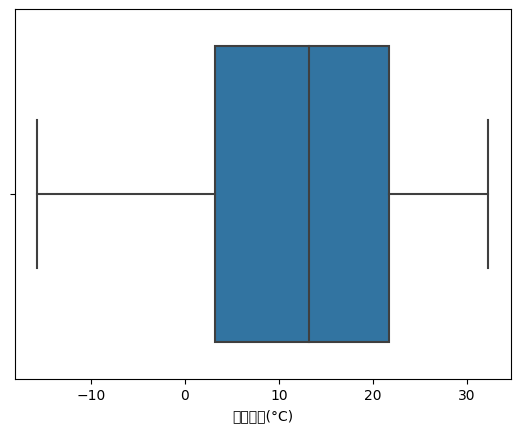

In [25]:
sns.boxplot(x=train_data["평균기온(°C)"])

<AxesSubplot:xlabel='평균 상대습도(%)'>

C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\sit

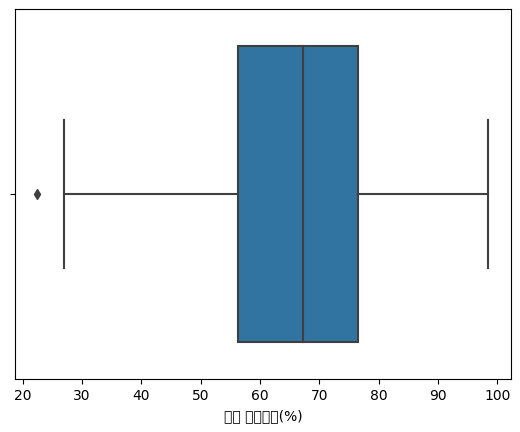

In [26]:
sns.boxplot(x=train_data["평균 상대습도(%)"])

<AxesSubplot:xlabel='평균 풍속(m/s)'>

C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pmk\AppData\Roa

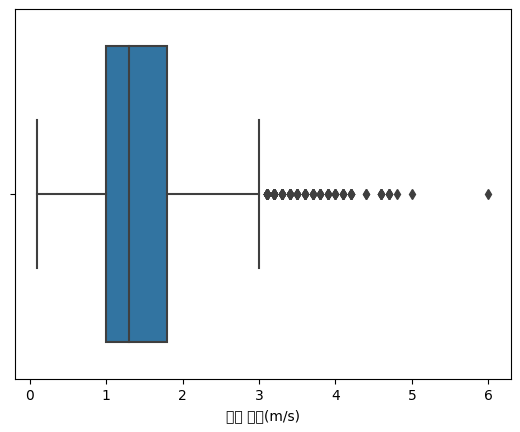

In [27]:
sns.boxplot(x=train_data['평균 풍속(m/s)'])

<AxesSubplot:xlabel='평균 해면기압(hPa)'>

C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
C:\Users\pmk\AppData\Roaming\Python\Python310\site

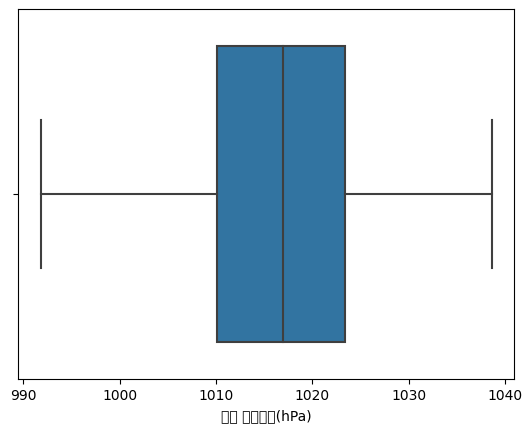

In [28]:
sns.boxplot(x=train_data["평균 해면기압(hPa)"])

Text(0.5, 1.0, 'MeanPressure')

<Figure size 10000x8000 with 0 Axes>

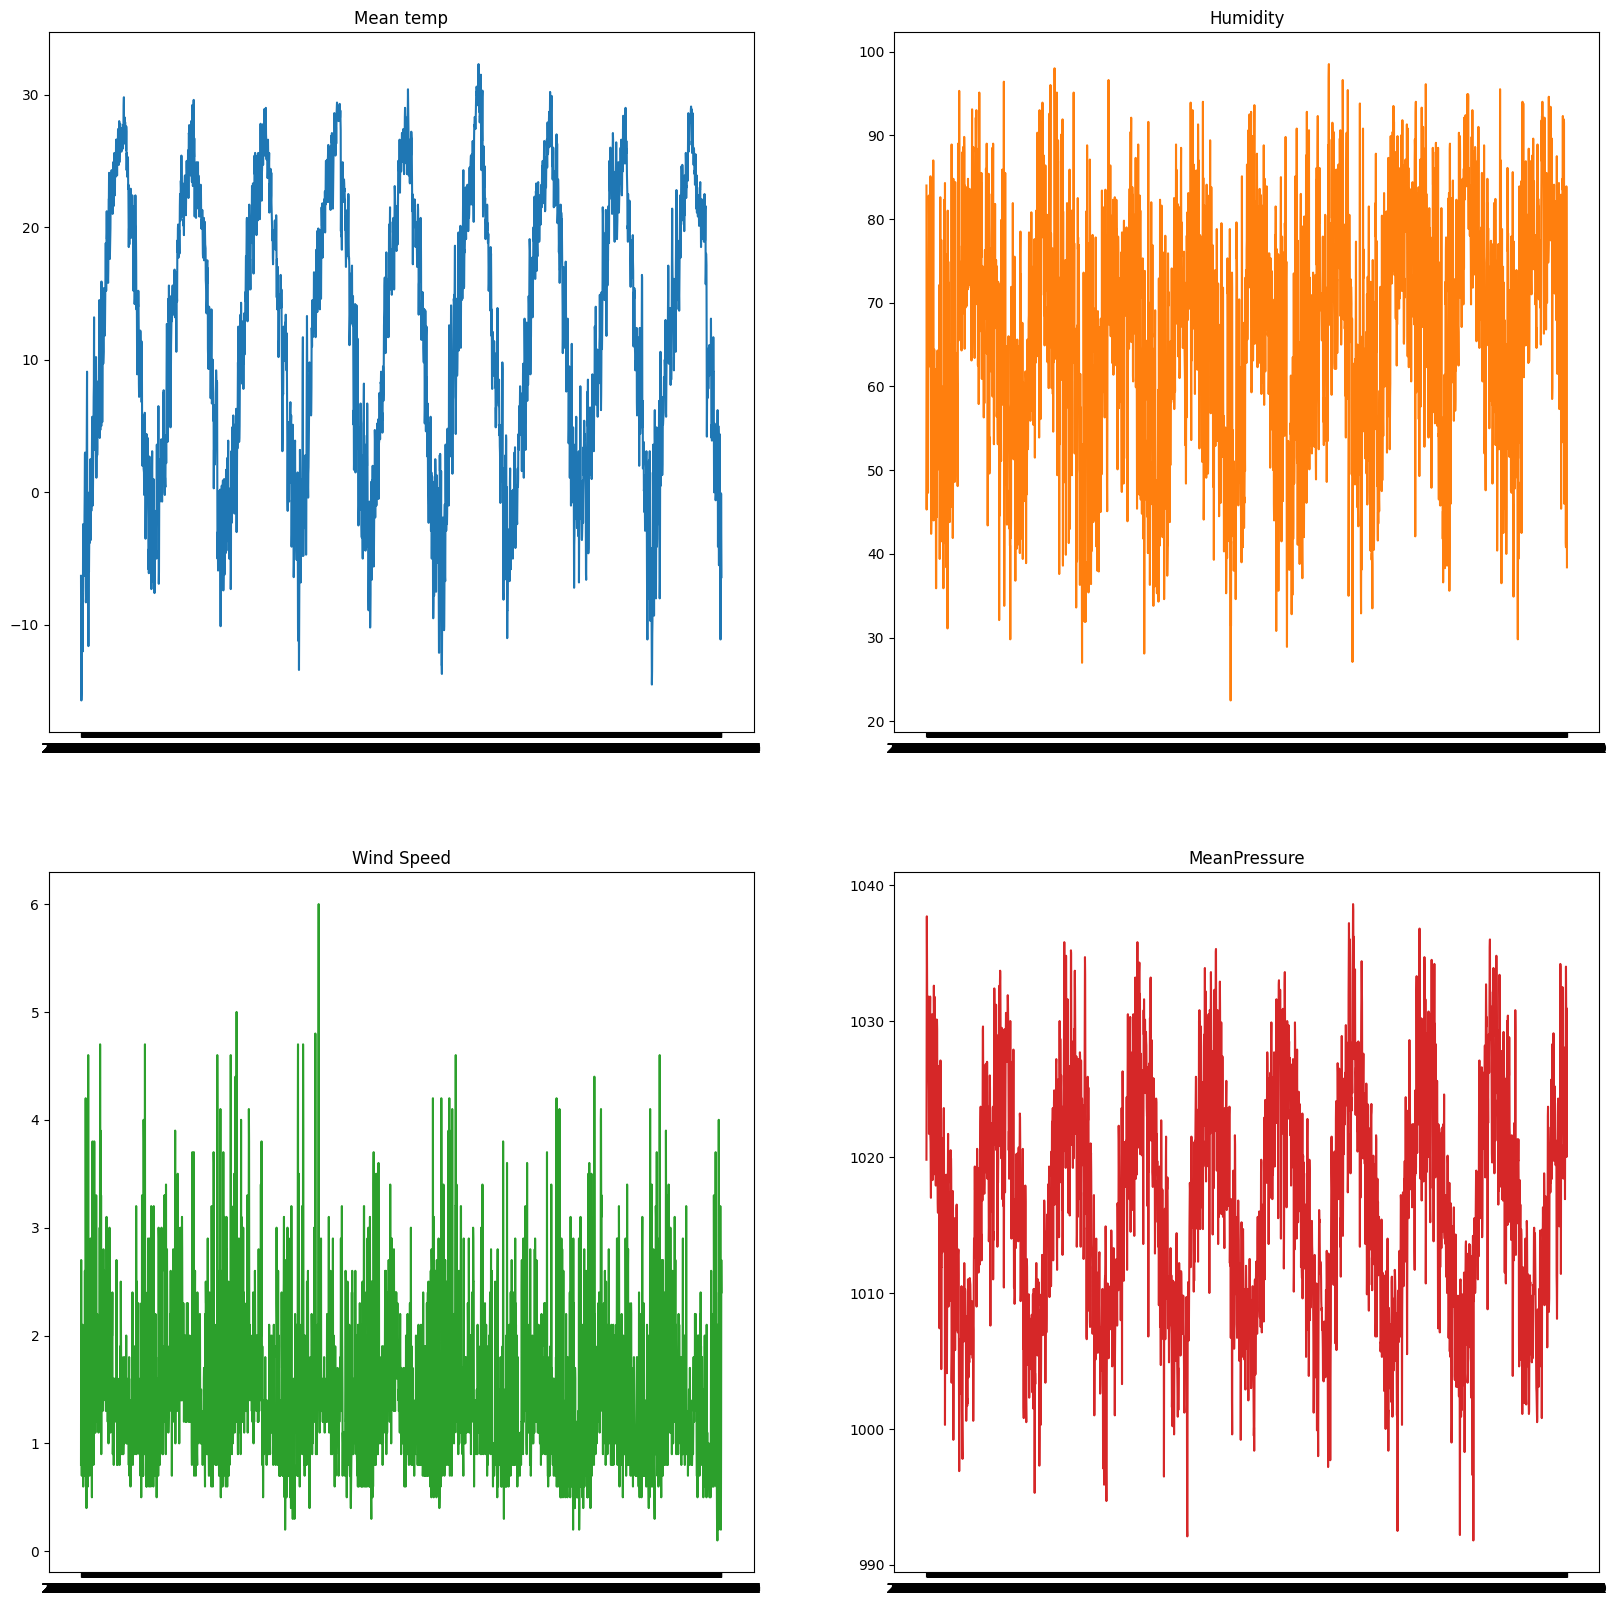

In [29]:
plt.figure(figsize=(100,80))
fig, axs = plt.subplots(2, 2,figsize=(20,20))
axs[0, 0].plot(train_data['일시'],train_data["평균기온(°C)"])
axs[0, 0].set_title('Mean temp')
axs[0, 1].plot(train_data['일시'],train_data["평균 상대습도(%)"], 'tab:orange')
axs[0, 1].set_title('Humidity')
axs[1, 0].plot(train_data['일시'],train_data['평균 풍속(m/s)'], 'tab:green')
axs[1, 0].set_title('Wind Speed')
axs[1, 1].plot(train_data['일시'],train_data['평균 해면기압(hPa)'], 'tab:red')
axs[1, 1].set_title('MeanPressure')

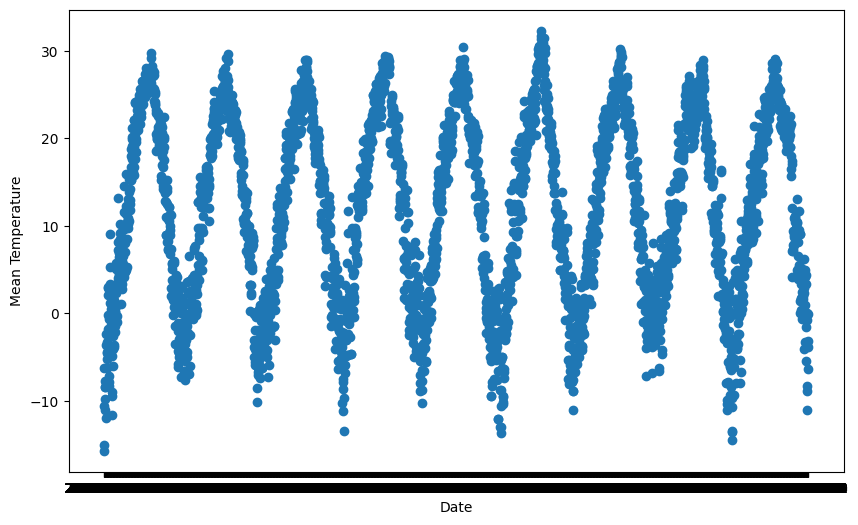

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_data['일시'], train_data['평균기온(°C)'])
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature')
plt.show()

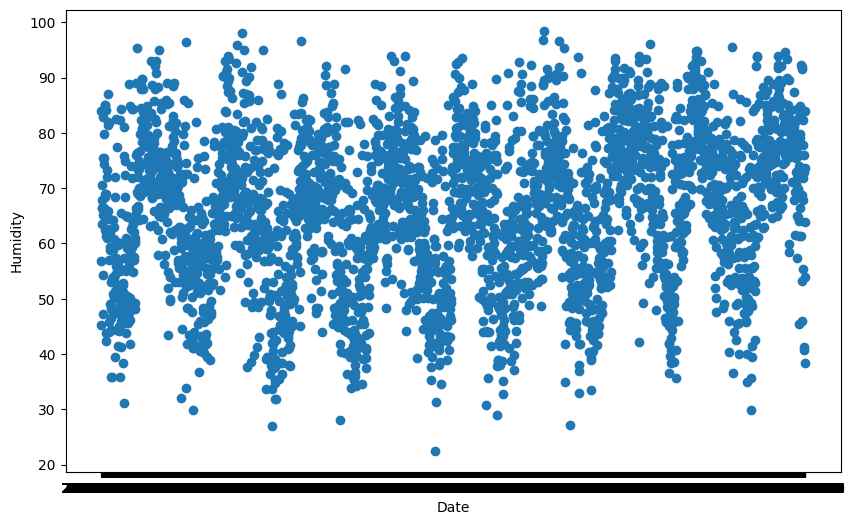

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_data['일시'], train_data['평균 상대습도(%)'])
ax.set_xlabel('Date')
ax.set_ylabel('Humidity')
plt.show()

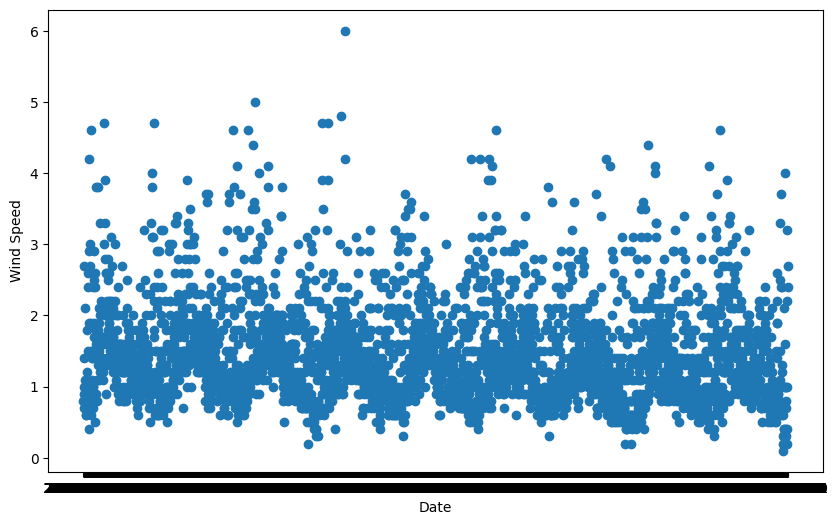

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_data['일시'], train_data['평균 풍속(m/s)'])
ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')
plt.show()

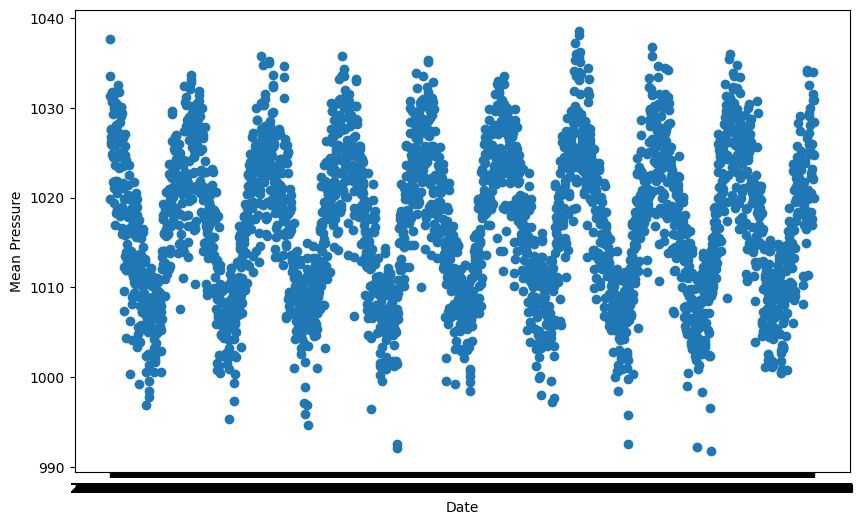

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_data['일시'], train_data['평균 해면기압(hPa)'])
ax.set_xlabel('Date')
ax.set_ylabel('Mean Pressure')
plt.show()

In [34]:
temp_train = train_data.iloc[:,1:2]
temp_test = test_data.iloc[:,1:2]

In [35]:
temp_train

,평균기온(°C)
0,-6.3
1,-10.6
2,-15.7
3,-15.1
4,-11.1
...,...
3282,-8.3
3283,-3.9
3284,-0.1
3285,-3.2


In [36]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
temp_train= ss.fit_transform(temp_train)
temp_test= ss.fit_transform(temp_test)

In [37]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
look_back = 1
trainX, trainY = create_dataset(temp_train, look_back)
testX, testY = create_dataset(temp_test, look_back)

In [39]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [40]:
np.isnan(trainX).sum()

0

In [41]:
# create and fit the LSTM network
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
model_temp = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_temp.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True))
model_temp.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 100, return_sequences = True))
model_temp.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_temp.add(LSTM(units = 50))
model_temp.add(Dropout(0.2))
# Adding the output layer
model_temp.add(Dense(units = 1))

# Compiling the RNN
model_temp.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_temp.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
103/103 [==============================] - 15s 18ms/step - loss: 0.0970 - accuracy: 6.0901e-04
Epoch 2/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0088 - accuracy: 6.0901e-04
Epoch 3/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0073 - accuracy: 6.0901e-04
Epoch 4/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0064 - accuracy: 6.0901e-04
Epoch 5/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0060 - accuracy: 6.0901e-04
Epoch 6/100
103/103 [==============================] - 1s 12ms/step - loss: 0.0056 - accuracy: 6.0901e-04
Epoch 7/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0054 - accuracy: 6.0901e-04
Epoch 8/100
103/103 [==============================] - 2s 15ms/step - loss: 0.0052 - accuracy: 6.0901e-04
Epoch 9/100
103/103 [==============================] - 2s 17ms/step - loss: 0.0051 - accuracy: 6.0901e-04
Epoch 10/100
103/103 [=======================

In [42]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
temp_test = ss.inverse_transform(temp_test)

8/8 [==============================] - 4s 4ms/step


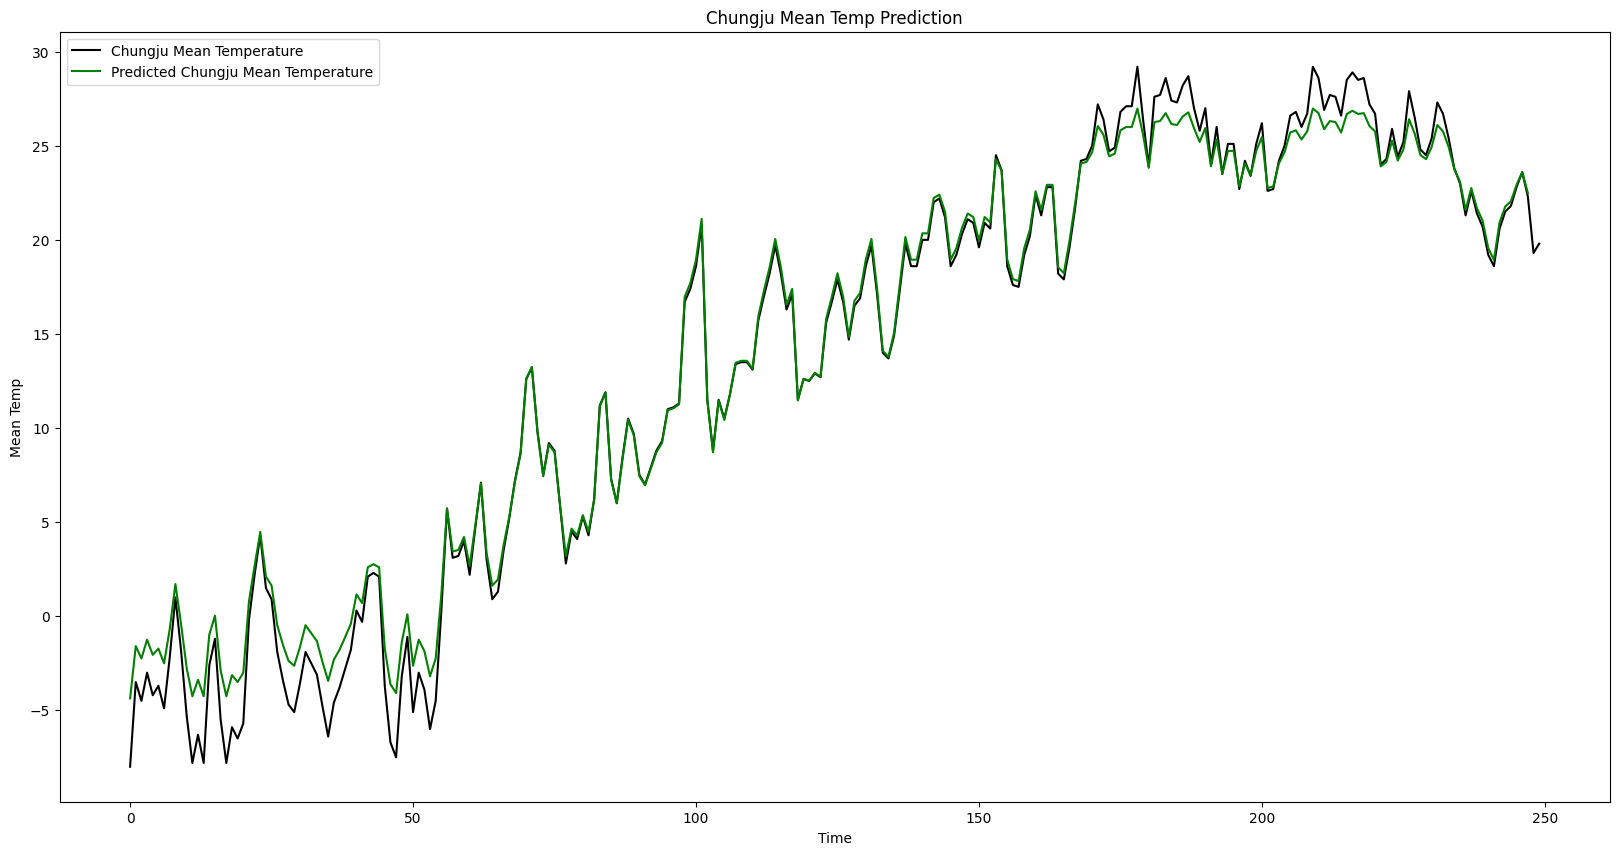

In [43]:
plt.figure(figsize=(20,10))
plt.plot(temp_test, color = 'black', label = 'Chungju Mean Temperature')
plt.plot(prediction, color = 'green', label = 'Predicted Chungju Mean Temperature')
plt.title('Chungju Mean Temp Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

In [44]:
# Humidity

humid_train = train_data.iloc[:,2:3]
humid_test = test_data.iloc[:,2:3]

In [45]:
#Scaling the values between 0 to 1

ss= MinMaxScaler(feature_range=(0,1))
humid_train= ss.fit_transform(humid_train)
humid_test= ss.fit_transform(humid_test)

In [46]:
look_back = 1
trainX, trainY = create_dataset(humid_train, look_back)
testX, testY = create_dataset(humid_test, look_back)

In [47]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [48]:
# create and fit the LSTM network
model_humid = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_humid.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 100, return_sequences = True))
model_humid.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 100, return_sequences = True))
model_humid.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_humid.add(LSTM(units = 50))
model_humid.add(Dropout(0.2))
# Adding the output layer
model_humid.add(Dense(units = 1))

# Compiling the RNN
model_humid.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_humid.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
103/103 [==============================] - 23s 13ms/step - loss: 0.0934 - accuracy: 6.0901e-04
Epoch 2/100
103/103 [==============================] - 2s 15ms/step - loss: 0.0234 - accuracy: 6.0901e-04
Epoch 3/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0220 - accuracy: 3.0451e-04
Epoch 4/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0210 - accuracy: 6.0901e-04
Epoch 5/100
103/103 [==============================] - 2s 17ms/step - loss: 0.0217 - accuracy: 6.0901e-04
Epoch 6/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0212 - accuracy: 6.0901e-04
Epoch 7/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0214 - accuracy: 6.0901e-04
Epoch 8/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0213 - accuracy: 6.0901e-04
Epoch 9/100
103/103 [==============================] - 2s 23ms/step - loss: 0.0205 - accuracy: 6.0901e-04
Epoch 10/100
103/103 [=======================

In [49]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
humid_test = ss.inverse_transform(humid_test)

8/8 [==============================] - 0s 7ms/step


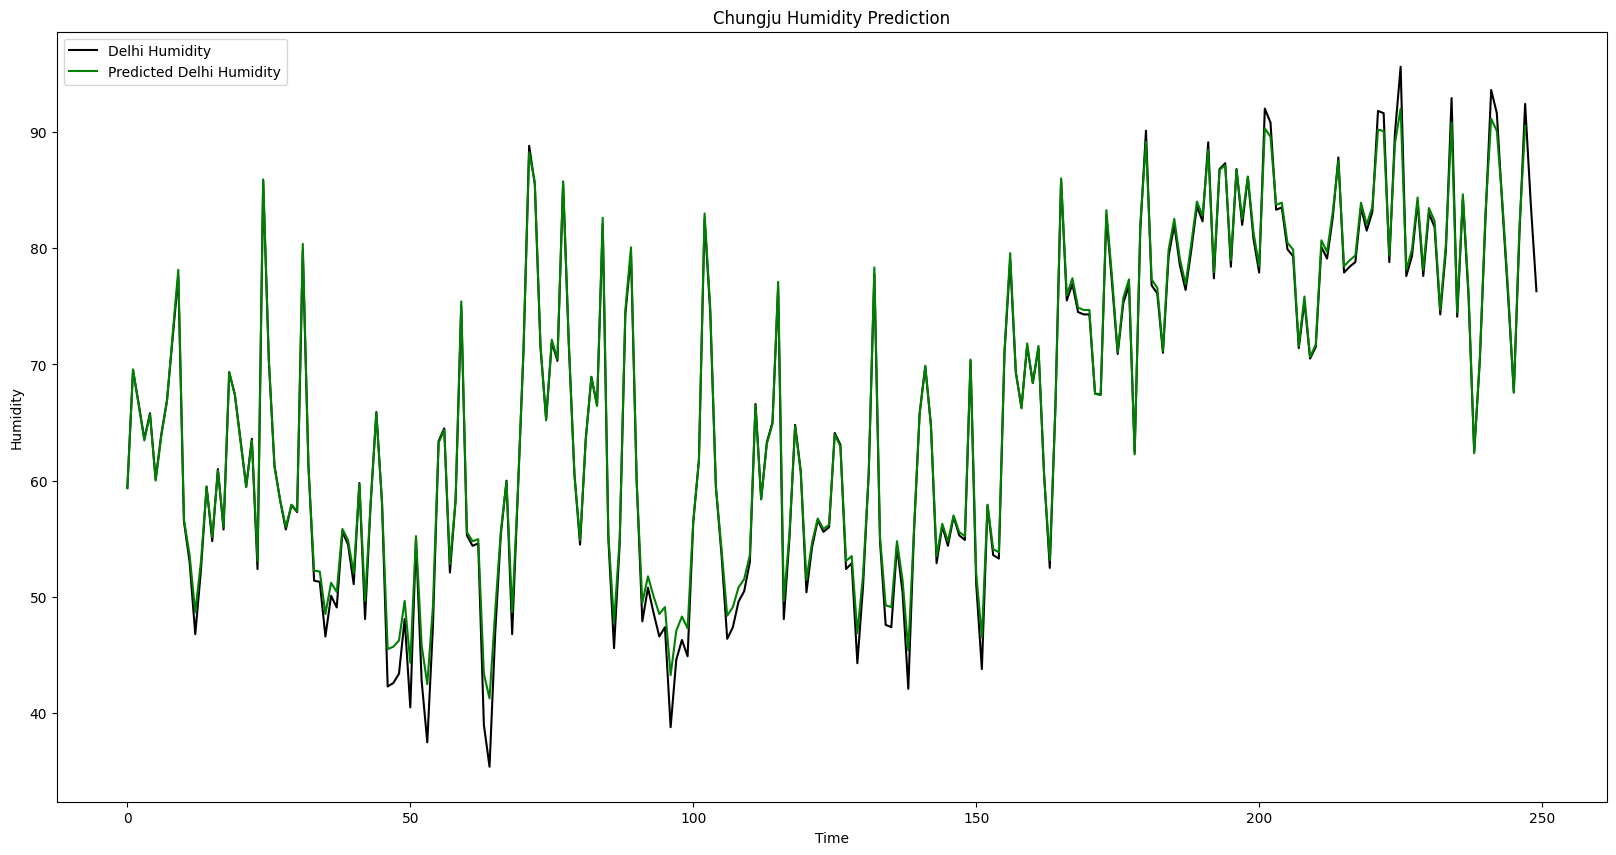

In [50]:
plt.figure(figsize=(20,10))
plt.plot(humid_test, color = 'black', label = 'Delhi Humidity')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Humidity')
plt.title('Chungju Humidity Prediction')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [51]:
## Wind speed column 
wind_train = train_data.iloc[:,3:4]
wind_test = test_data.iloc[:,3:4]

In [52]:
#Scaling the values between 0 to 1

wind_train= ss.fit_transform(wind_train)
wind_test= ss.fit_transform(wind_test)

In [53]:
look_back = 1
trainX, trainY = create_dataset(wind_train, look_back)
testX, testY = create_dataset(wind_test, look_back)

In [54]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [55]:
# create and fit the LSTM network
model_wind = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_wind.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 100, return_sequences = True))
model_wind.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 100, return_sequences = True))
model_wind.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_wind.add(LSTM(units = 50))
model_wind.add(Dropout(0.2))
# Adding the output layer
model_wind.add(Dense(units = 1))

# Compiling the RNN
model_wind.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_wind.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
103/103 [==============================] - 24s 16ms/step - loss: 0.0219 - accuracy: 3.0451e-04
Epoch 2/100
103/103 [==============================] - 2s 17ms/step - loss: 0.0138 - accuracy: 3.0451e-04
Epoch 3/100
103/103 [==============================] - 2s 17ms/step - loss: 0.0136 - accuracy: 3.0451e-04
Epoch 4/100
103/103 [==============================] - 2s 17ms/step - loss: 0.0135 - accuracy: 3.0451e-04
Epoch 5/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0134 - accuracy: 3.0451e-04
Epoch 6/100
103/103 [==============================] - 2s 18ms/step - loss: 0.0134 - accuracy: 3.0451e-04
Epoch 7/100
103/103 [==============================] - 2s 16ms/step - loss: 0.0135 - accuracy: 3.0451e-04
Epoch 8/100
103/103 [==============================] - 2s 16ms/step - loss: 0.0134 - accuracy: 3.0451e-04
Epoch 9/100
103/103 [==============================] - 2s 17ms/step - loss: 0.0133 - accuracy: 3.0451e-04
Epoch 10/100
103/103 [=======================

In [56]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
wind_test = ss.inverse_transform(wind_test)

8/8 [==============================] - 0s 4ms/step


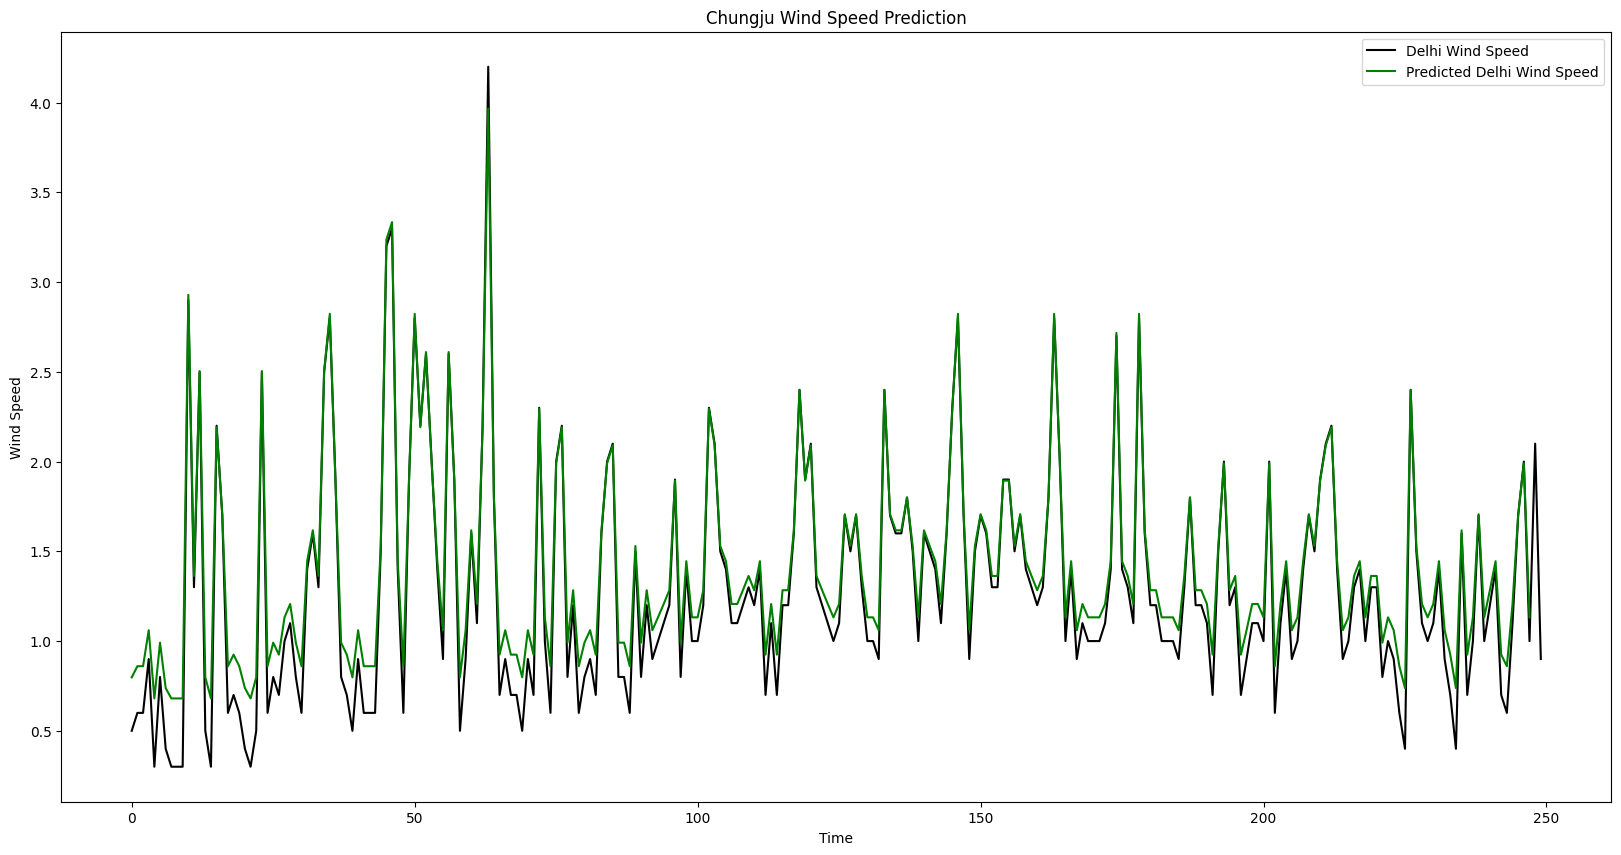

In [57]:
plt.figure(figsize=(20,10))
plt.plot(wind_test, color = 'black', label = 'Delhi Wind Speed')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Wind Speed')
plt.title('Chungju Wind Speed Prediction')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

In [58]:
## Mean Pressure column 
pressure_train = train_data.iloc[:,4:]
pressure_test = test_data.iloc[:,4:]

In [59]:
#Scaling the values between 0 to 1

pressure_train= ss.fit_transform(pressure_train)
pressure_test= ss.fit_transform(pressure_test)

In [60]:
trainX, trainY = create_dataset(pressure_train, look_back)
testX, testY = create_dataset(pressure_test, look_back)

In [61]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [62]:
# create and fit the LSTM network
model_pressure = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 100, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model_pressure.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 100, return_sequences = True))
model_pressure.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 100, return_sequences = True))
model_pressure.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model_pressure.add(LSTM(units = 50))
model_pressure.add(Dropout(0.2))
# Adding the output layer
model_pressure.add(Dense(units = 1))

# Compiling the RNN
model_pressure.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

# Fitting the RNN to the Training set
model_pressure.fit(trainX, trainY, epochs = 100, batch_size = 32)

Epoch 1/100
103/103 [==============================] - 17s 14ms/step - loss: 0.0792 - accuracy: 6.0901e-04
Epoch 2/100
103/103 [==============================] - 2s 15ms/step - loss: 0.0128 - accuracy: 6.0901e-04
Epoch 3/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0105 - accuracy: 6.0901e-04
Epoch 4/100
103/103 [==============================] - 1s 12ms/step - loss: 0.0099 - accuracy: 6.0901e-04
Epoch 5/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0093 - accuracy: 6.0901e-04
Epoch 6/100
103/103 [==============================] - 1s 14ms/step - loss: 0.0095 - accuracy: 6.0901e-04
Epoch 7/100
103/103 [==============================] - 1s 14ms/step - loss: 0.0094 - accuracy: 6.0901e-04
Epoch 8/100
103/103 [==============================] - 1s 14ms/step - loss: 0.0093 - accuracy: 6.0901e-04
Epoch 9/100
103/103 [==============================] - 1s 13ms/step - loss: 0.0090 - accuracy: 6.0901e-04
Epoch 10/100
103/103 [=======================

In [63]:
# PREDICTION

prediction = model_temp.predict(testX)
prediction = ss.inverse_transform(prediction)
pressure_test = ss.inverse_transform(pressure_test)

8/8 [==============================] - 0s 5ms/step


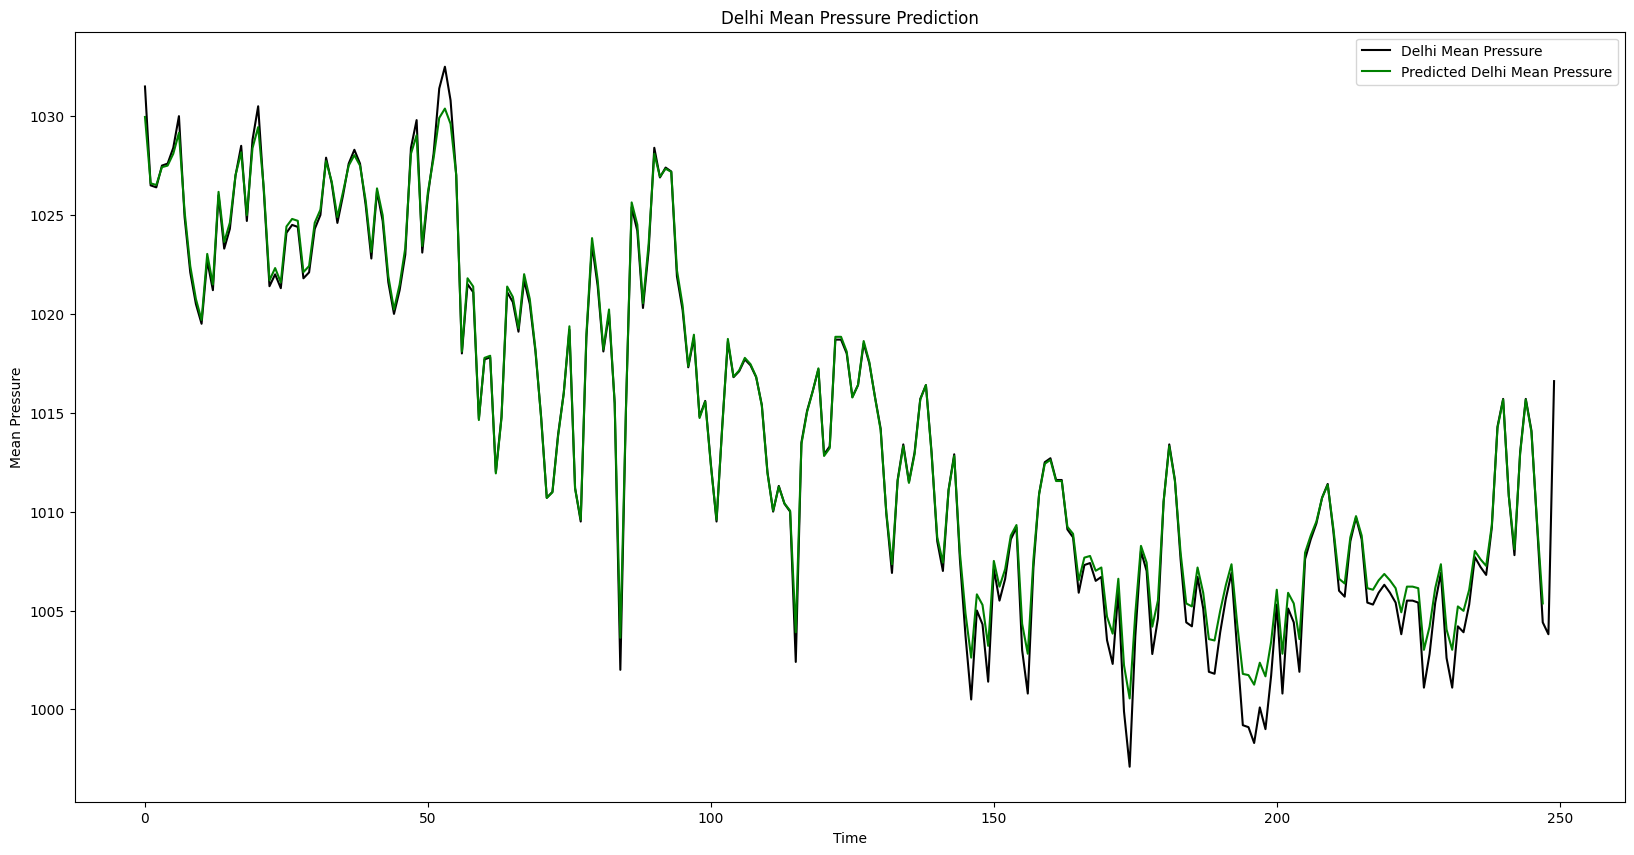

In [64]:
plt.figure(figsize=(20,10))
plt.plot(pressure_test, color = 'black', label = 'Delhi Mean Pressure')
plt.plot(prediction, color = 'green', label = 'Predicted Delhi Mean Pressure')
plt.title('Delhi Mean Pressure Prediction')
plt.xlabel('Time')
plt.ylabel('Mean Pressure')
plt.legend()
plt.show()